<div class="output_png output_subarea output_execute_result">
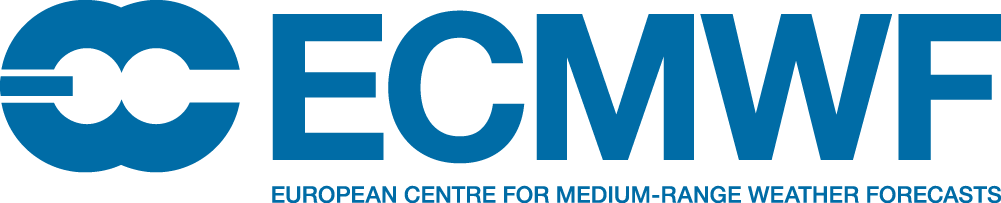
</div>

# 	Height of zero degree level (Temperature/Wet bulb temperature)

This notebook will provide you guidance how to explore ECMWF data to produce the map from the ECMWF open charts web product.  
The original product can be found on this link: https://apps.ecmwf.int/webapps/opencharts/products/medium-zero-level  


<div class="output_png output_subarea output_execute_result">
<center>
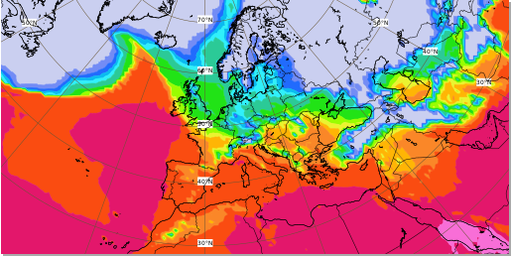</center>
</div>

ECMWF forecast data is available under diffrent licences for different users. To find out which licence applies to you please visit our [Use cases and licence conditions page](https://www.ecmwf.int/en/forecasts/accessing-forecasts/licences-available).

To find out how to obtain the access to the ECMWF forecast data please visit our [Access page](https://www.ecmwf.int/en/forecasts/accessing-forecasts).

## Retrieve Data
This product takes in input one of two parameters:

* [0 degrees C isothermal level (atm)](https://apps.ecmwf.int/codes/grib/param-db/?id=228024)
* [Height of zero-degree wet-bulb temperature](https://apps.ecmwf.int/codes/grib/param-db/?id=228047)

In this example, we will use: 
- [**ecmwf-api-client**](https://pypi.org/project/ecmwf-api-client/) to download the data
- [**ecmwf.data**](https://github.com/ecmwf/ecmwf-data) library to read and process the data 
- [**magpye**](https://magpye.readthedocs.io) to plot the result

First we need to install them in the current Jupyter kernel:  
<div class="alert alert-block alert-info">
<b>Note:</b> If you are running the notebook on MyBinder or already have the libraries installed, go directly to importing the libraries.
</div>
<div class="alert alert-block alert-info">
<b>Note:</b> If you don't have these libraries installed, click on three dots below, uncomment the code and run the next cell.
</div>

In [1]:
#!pip install ecmwf-data ecmwf-api-client magpye

In [1]:
import ecmwf.data as ecdata
from magpye import GeoMap
from ecmwfapi import *
import requests

In [2]:
filename = 'medium-zero-level.grib'

If you already have the access to the ECMWF archived forecast data, you can use the next cell to download data from the [MARS archive](https://confluence.ecmwf.int/display/UDOC/MARS+user+documentation):

In [ ]:
server = ECMWFService("mars")
server.execute(
    {
    "class": "od",
    "date": "-1",
    "expver": "1",
    "levtype": "sfc",
    "param": "228024/228047",
    "step": "12",
    "stream": "oper",
    "time": "00",
    "type": "fc",
    "grid": "0.4/0.4"
    },
    filename)

Alternatevly we have prepared small sample dataset to explore

In [3]:
url = f"https://get.ecmwf.int/repository/opencharts-sample-data/{filename}"
r = requests.get(url)
with open(filename, 'wb') as file:
    file.write(r.content)

## Reading and processing the data
Now we can use **ecmwf.data** to read the file.

In [4]:
data = ecdata.read(filename)

The **describe()** function will give us the overview of the dataset.  

In [5]:
data.describe()

parameter,typeOfLevel,level,date,time,step,paramId,class,stream,type,experimentVersionNumber
deg0l,surface,0,20220403,0,12,228024,od,oper,fc,0001
hwbt0,surface,0,20220403,0,12,228047,od,oper,fc,0001


And an overview of one parameter, where we can see more information, such as units or type of level.

In [6]:
data.describe('deg0l')

shortName,deg0l
name,0 degrees C isothermal level (atm)
paramId,228024
units,m
typeOfLevel,surface
level,0
date,20220403
time,0
step,12
class,od
stream,oper


We can use **ls()** function to list all the fields in the file we downloaded.

In [7]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,gridType
Message,,,,,,,,,
0,ecmf,deg0l,surface,0,20220403,0,12,fc,regular_ll
1,ecmf,hwbt0,surface,0,20220403,0,12,fc,regular_ll


The grib file contains all the parameters, and we will use the select() function to filter what we need.

In [8]:
deg0l = data.select(shortName = 'deg0l')
hwbt0 = data.select(shortName = 'hwbt0')

## Plotting the data
And finally, we can plot the data on the map.  
First we will plot height of zero degree temperature.

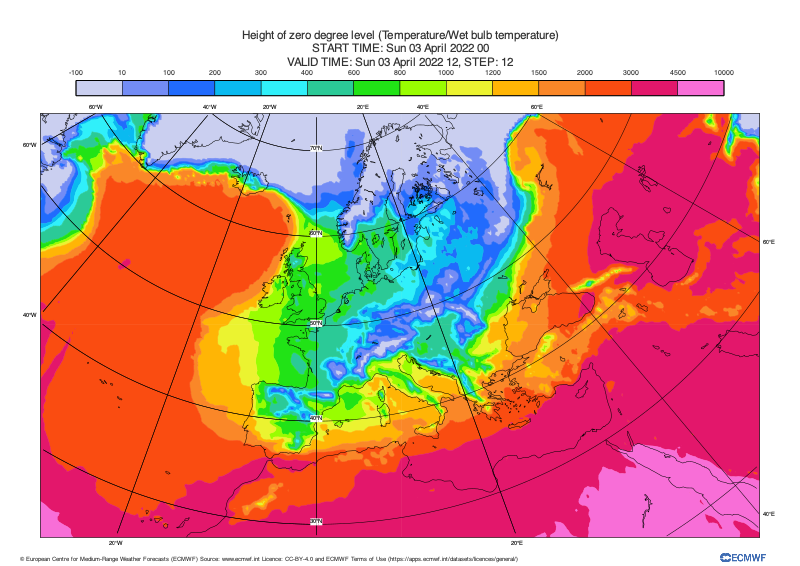

In [9]:
fig = GeoMap(area_name='europe')

fig.coastlines(land_colour="cream",resolution="medium")

fig.contour_shaded(deg0l, style="height_zero_1")

fig.coastlines(resolution="medium")
fig.gridlines()

fig.title(["Height of zero degree level (Temperature/Wet bulb temperature)",
           "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H'/> ",
           "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H'/>, STEP: <grib_info key='step'/>"])
fig.legend()
fig.footer("© European Centre for Medium-Range Weather Forecasts (ECMWF) Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use (https://apps.ecmwf.int/datasets/licences/general/)", logo='ecmwf')

fig.show()

And finally we can plot Height of zero-degree wet-bulb temperature:

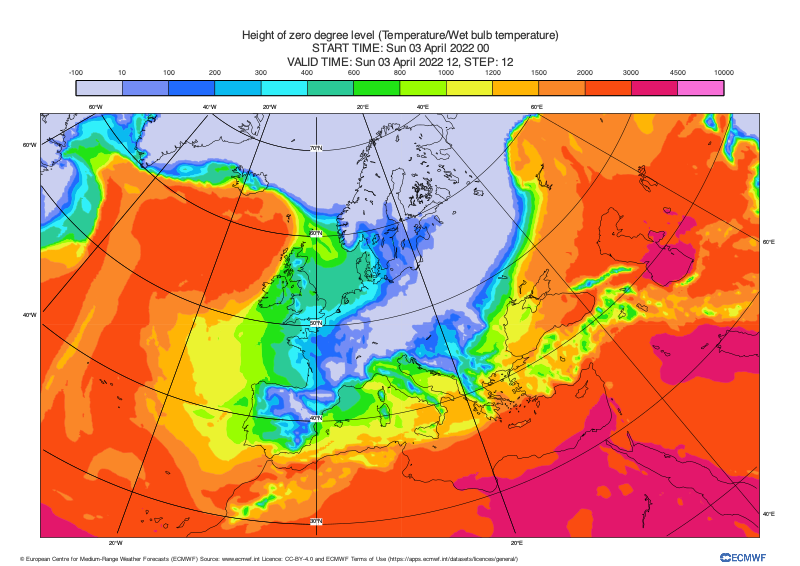

In [10]:
fig = GeoMap(area_name='europe')

fig.coastlines(land_colour="cream",resolution="medium")

fig.contour_shaded(hwbt0, style="height_zero_1")

fig.coastlines(resolution="medium")
fig.gridlines()

fig.title(["Height of zero degree level (Temperature/Wet bulb temperature)",
           "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H'/> ",
           "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' />, STEP: <grib_info key='step' />"])
fig.legend()
fig.footer("© European Centre for Medium-Range Weather Forecasts (ECMWF) Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use (https://apps.ecmwf.int/datasets/licences/general/)", logo='ecmwf')

fig.show()

Note that plot produced using this dataset will slightly differ from one from Open Charts. This is due to different resolution of the data.  
The data used here is on 0.4x0.4 resolution, while high resolution data is 0.1x0.1 grid.